# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD" + "?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD" + "?format=json"

In [5]:
# Fetch current BTC price
r1 = requests.get(btc_url)
rc1 = r1.content
j1 = r1.json()
json.dumps(j1, indent=4)
btc_price = j1['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
r2 = requests.get(eth_url)
rc2 = r2.content
j2 = r2.json()
json.dumps(j2, indent=4)
eth_price = j2['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
my_btc_value = (my_btc *btc_price)
my_eth_value = (my_eth * eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $55861.20
The current value of your 5.3 ETH is $18394.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version="v2")

In [8]:
from alpaca_trade_api.rest import REST, TimeFrame

In [9]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-03-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
# TimeFrame = "1D"

# Get current closing prices for SPY and AGG
investment_dataframe = alpaca.get_bars(tickers, TimeFrame.Day, "2018-03-01", "2022-03-01", adjustment='raw').df

# Preview DataFrame
investment_dataframe

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-03-01 05:00:00+00:00,106.54,106.7200,106.381,106.63,7335507,28725,106.548687,AGG
2018-03-02 05:00:00+00:00,106.47,106.5498,106.360,106.46,3717422,12438,106.445356,AGG
2018-03-05 05:00:00+00:00,106.60,106.6500,106.280,106.40,3307229,14538,106.414498,AGG
2018-03-06 05:00:00+00:00,106.45,106.5600,106.380,106.42,1932355,8977,106.459567,AGG
2018-03-07 05:00:00+00:00,106.51,106.5500,106.370,106.40,3448700,11732,106.485283,AGG
...,...,...,...,...,...,...,...,...
2022-02-23 05:00:00+00:00,432.65,433.2600,421.350,422.07,126065955,1119436,425.990714,SPY
2022-02-24 05:00:00+00:00,411.00,428.7600,410.640,428.30,213249029,2310796,419.738184,SPY
2022-02-25 05:00:00+00:00,429.55,437.8400,427.860,437.75,116947965,1084239,434.342632,SPY


In [10]:
df = investment_dataframe[['close', 'symbol']]
df.index = df.index.date
df

,close,symbol
2018-03-01,106.63,AGG
2018-03-02,106.46,AGG
2018-03-05,106.40,AGG
2018-03-06,106.42,AGG
2018-03-07,106.40,AGG
...,...,...
2022-02-23,422.07,SPY
2022-02-24,428.30,SPY
2022-02-25,437.75,SPY
2022-02-28,436.63,SPY


In [11]:
df1 = pd.pivot_table(df, values = 'close', index = df.index, columns=['symbol'])
df1

symbol,AGG,SPY
2018-03-01,106.63,267.70
2018-03-02,106.46,269.08
2018-03-05,106.40,272.19
2018-03-06,106.42,272.88
2018-03-07,106.40,272.78
...,...,...
2022-02-23,109.26,422.07
2022-02-24,109.46,428.30
2022-02-25,109.57,437.75
2022-02-28,110.36,436.63


In [12]:
# Pick AGG and SPY close prices
agg_close = df1['AGG'].iloc[-1]
spy_close = df1['SPY'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $110.82
Current SPY closing price: $429.98


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close
my_agg_value = my_agg * agg_close

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21499.00
The current value of your 200 AGG shares is $22164.00


### Savings Health Analysis

In [14]:
# Set monthly household income
household_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value+my_eth_value
total_shares = my_spy_value+my_agg_value


# Create savings DataFrame
savings = {
    'amount': [total_crypto, total_shares]
}

df_savings = pd.DataFrame(savings)
df_savings.index = ['crypto', 'shares']
# Display savings DataFrame
display(df_savings)

,amount
crypto,74255.91
shares,43663.00


array([<AxesSubplot:ylabel='amount'>], dtype=object)

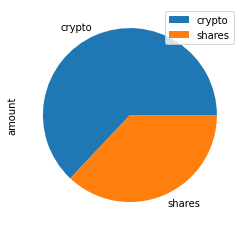

In [15]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [16]:
# Set ideal emergency fund
emergency_fund = household_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings < emergency_fund:
    print('Unfortunately you do not have enough in your emergency fund')
elif total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund')
else:
    print('You are exactly on pace for your emergency fund')

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
t1 = "AGG"
agg_df = alpaca.get_bars(t1, TimeFrame.Day, start_date, end_date, adjustment='raw').df
agg_df.index = agg_df.index.date
agg_df=agg_df[['close']]
micolumns = pd.MultiIndex.from_tuples(
    [(t1, "close")]
)
agg_df.columns = micolumns


t2 = "SPY"
spy_df = alpaca.get_bars(t2, TimeFrame.Day, start_date, end_date, adjustment='raw').df
spy_df.index = spy_df.index.date
spy_df=spy_df[['close']]
mcolumns = pd.MultiIndex.from_tuples(
    [(t2, "close")]
)
spy_df.columns = mcolumns

df_stock_data = pd.concat([agg_df, spy_df], axis=1)

# Display sample data
df_stock_data.head()


,AGG,SPY
,close,close
2016-05-02,110.61,208.03
2016-05-03,110.81,206.13
2016-05-04,110.86,204.96
2016-05-05,111.14,204.95
2016-05-06,110.97,205.70


In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
weights = [.40,.60]
mc_simulation = MCSimulation(portfolio_data = df_stock_data, weights=weights,num_simulation=500, num_trading_days=252*30)

In [21]:
# Printing the simulation input data
mc_simulation.portfolio_data.head()

AGG                  SPY             
             close daily_return   close daily_return
2016-05-02  110.61          NaN  208.03          NaN
2016-05-03  110.81     0.001808  206.13    -0.009133
2016-05-04  110.86     0.000451  204.96    -0.005676
2016-05-05  111.14     0.002526  204.95    -0.000049
2016-05-06  110.97    -0.001530  205.70     0.003659

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ritwi\Fintech\Weekly_Classes\class_activities\sharpe_ratio\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005583,0.997350,1.005555,1.000249,0.996473,1.004257,1.005754,0.998305,0.985809,1.012294,...,0.992541,0.991129,0.993447,1.001104,1.002566,0.995747,0.994481,1.002039,1.001199,0.992365
2,1.004686,0.995133,1.003906,1.000074,0.992444,1.006340,1.003951,0.995211,0.985619,1.001555,...,0.994952,0.997633,0.992754,1.004132,1.021531,1.005048,0.990035,0.993523,1.001331,0.987068
3,1.005521,0.996110,1.000423,0.997379,1.000580,1.014964,0.998525,0.991314,0.979326,1.000867,...,0.999208,0.990152,0.986533,1.001435,1.030932,1.008306,0.988803,0.995747,0.988482,0.976431
4,1.007939,0.987097,1.007676,1.012667,1.011572,1.005567,0.997772,1.002109,0.975043,1.005422,...,1.003856,0.983510,0.990584,1.004138,1.031356,1.008467,1.009958,0.999136,0.992741,0.969487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.130317,25.068763,32.015011,7.735973,9.223319,7.794693,7.254460,13.941802,34.156638,47.421840,...,16.032596,23.049381,22.141153,43.112372,30.961909,26.869385,7.220301,9.824799,6.071778,19.730639
7557,25.059091,25.030164,32.230734,7.632116,9.288884,7.789300,7.262143,13.999021,34.356382,47.023849,...,16.104385,23.046794,22.198440,42.841079,31.116019,26.829952,7.332928,9.848899,6.068459,19.713264
7558,25.473957,24.938123,32.241670,7.601619,9.235956,7.778432,7.365203,13.940156,34.774727,46.640374,...,16.161484,22.896509,22.277197,42.642159,31.258401,27.304216,7.304772,9.890468,6.119400,19.810036
7559,25.504155,25.063196,32.449902,7.639234,9.273053,7.683285,7.448005,14.074406,35.187978,45.795192,...,16.198498,22.891499,22.165992,42.691477,31.139341,27.269200,7.376359,9.969005,6.090493,19.947609


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

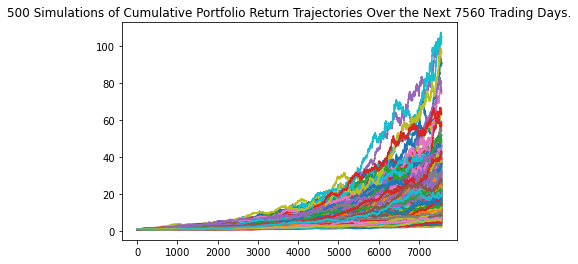

In [23]:
# Plot simulation outcomes
mc_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

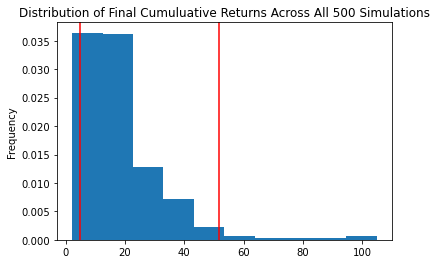

In [24]:
# Plot probability distribution and confidence intervals
mc_simulation.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = mc_simulation.summarize_cumulative_return()


# Print summary statistics
summary

count           500.000000
mean             18.988489
std              13.924588
min               2.171861
25%              10.013690
50%              15.554160
75%              22.799459
max             104.856850
95% CI Lower      4.709755
95% CI Upper     51.746227
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((initial_investment * summary[8]),2)
ci_upper = round((initial_investment * summary[9]),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $94195.09 and $1034924.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((initial_investment * summary[8]),2)
ci_upper = round((initial_investment * summary[9]),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $141292.64 and $1552386.82


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ritwi\Fintech\Weekly_Classes\class_activities\sharpe_ratio\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002520,1.001004,0.998552,1.000690,1.000100,0.999440,0.999396,0.997360,1.000497,0.996429,...,1.001132,0.998897,1.002098,1.000298,0.998037,1.000725,0.997686,1.001724,1.000399,0.998142
2,1.006216,0.999016,0.997350,1.000384,0.995136,1.003042,1.005611,1.000753,1.003533,0.995657,...,1.002874,1.001479,1.001842,0.995982,0.995808,1.002030,0.996191,1.001735,1.000018,1.000788
3,1.006371,0.996002,1.002433,0.998287,0.997440,1.005641,1.004869,0.997018,1.004584,0.995893,...,0.999616,1.000423,1.002466,0.996822,0.997395,1.003479,0.992079,1.001387,0.999069,1.000019
4,1.006381,0.991744,1.001685,1.003548,0.995341,1.002374,0.998845,1.002286,1.007972,1.000641,...,0.998757,1.001925,0.998331,0.997267,0.999419,1.003012,0.995091,1.003802,0.999039,1.002936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.026666,1.169590,1.222345,1.383335,1.201785,1.230204,1.282992,1.338615,1.120183,1.379515,...,1.239572,1.081141,1.110203,1.242152,0.976271,1.418361,1.147312,1.277481,1.162728,1.173500
1257,1.025846,1.166806,1.224590,1.383380,1.206345,1.234185,1.281186,1.336797,1.124002,1.383423,...,1.237954,1.079986,1.110370,1.234399,0.980809,1.421508,1.143481,1.280249,1.159626,1.173405
1258,1.029259,1.170500,1.214000,1.385163,1.204221,1.231061,1.277931,1.343318,1.121733,1.381874,...,1.235604,1.088413,1.107825,1.238050,0.985355,1.425765,1.150785,1.284798,1.162935,1.171264
1259,1.029497,1.178188,1.208984,1.383835,1.202795,1.230762,1.277429,1.343726,1.120180,1.391388,...,1.237101,1.089204,1.118623,1.235905,0.980869,1.426936,1.150862,1.282910,1.162542,1.172917


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

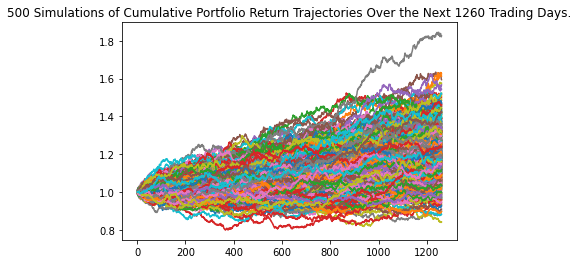

In [30]:
# Plot simulation outcomes
five_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

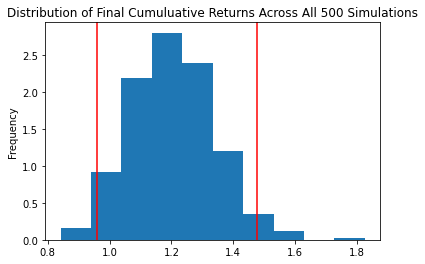

In [31]:
# Plot probability distribution and confidence intervals
five_years.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
five_summary = five_years.summarize_cumulative_return()

# Print summary statistics
five_summary

count           500.000000
mean              1.205193
std               0.137258
min               0.841525
25%               1.113071
50%               1.201125
75%               1.296673
max               1.825558
95% CI Lower      0.959714
95% CI Upper      1.477737
Name: 1260, dtype: float64

In [33]:
# Set initial investment
five_initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round((initial_investment * summary[8]),2)
ci_upper_five = round((initial_investment * summary[9]),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${five_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $141292.64 and $1552386.82


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ritwi\Fintech\Weekly_Classes\class_activities\sharpe_ratio\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998014,0.995891,1.000904,0.999791,1.003660,1.002206,1.001744,0.995922,0.998264,1.001680,...,1.001018,1.000310,0.994031,1.006206,0.998375,0.999010,1.004690,1.002917,0.997728,0.998429
2,1.002787,0.993546,0.997851,1.003007,1.002181,1.001631,1.003451,0.998048,0.991493,1.000079,...,0.998700,1.000104,0.995151,1.004898,0.997448,0.998422,1.013557,1.006284,1.001293,1.002684
3,1.002161,0.991046,0.995841,1.004393,1.004464,1.001525,1.004392,0.997822,0.993074,1.001376,...,1.000553,0.994686,0.998172,1.008285,0.997657,0.993791,1.011042,1.002580,1.006966,0.998729
4,1.000228,0.995359,1.002665,1.000294,1.005525,1.001735,1.006107,1.002725,0.992756,0.999254,...,0.998582,0.993156,1.003116,1.007421,0.999178,0.995792,1.013041,1.006558,1.002760,0.995268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.439045,1.192680,1.619363,1.091705,1.332678,1.201915,1.134307,1.424799,1.753474,2.019268,...,1.751934,1.165453,1.668347,1.541583,1.272872,1.427397,2.053273,1.069899,2.085820,1.747880
2517,1.441778,1.200406,1.616406,1.092029,1.332346,1.208209,1.132557,1.422519,1.761994,2.021564,...,1.751956,1.162257,1.673164,1.539743,1.272099,1.432187,2.054520,1.070024,2.090864,1.751368
2518,1.441331,1.200471,1.615857,1.090198,1.332808,1.203512,1.133849,1.423289,1.754710,2.029535,...,1.754399,1.164381,1.674083,1.533840,1.271704,1.425888,2.051222,1.069093,2.091675,1.747234
2519,1.443638,1.200721,1.609597,1.091643,1.335093,1.200228,1.136280,1.419035,1.752748,2.019775,...,1.760563,1.171741,1.677054,1.529196,1.271026,1.424297,2.049930,1.069062,2.085862,1.740684


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

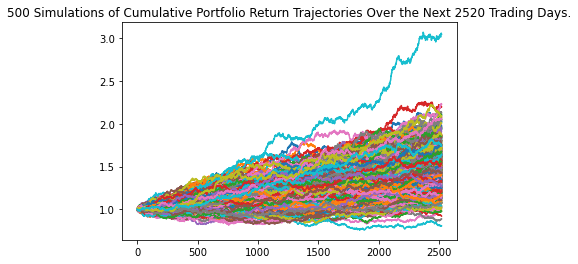

In [36]:
# Plot simulation outcomes
ten_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

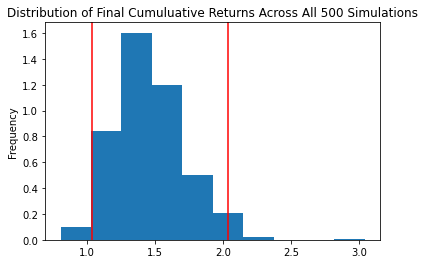

In [37]:
# Plot probability distribution and confidence intervals
ten_years.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_summary = ten_years.summarize_cumulative_return()

# Print summary statistics
ten_summary

count           500.000000
mean              1.462698
std               0.255531
min               0.808109
25%               1.281441
50%               1.434692
75%               1.616953
max               3.042903
95% CI Lower      1.039864
95% CI Upper      2.039697
Name: 2520, dtype: float64

In [39]:
# Set initial investment
ten_initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round((ten_initial_investment * summary[8]),2)
ci_upper_ten = round((ten_initial_investment * summary[9]),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $94195.09 and $1034924.55
